In [1]:
#Modelling

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Logistic Regression
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [18]:
df_model = pd.read_csv('covid_restaurant_full_post_VIF.csv')
df_model = df_model.iloc[: , 1:]
df_model.head(10)

,rating,price,pickup,delivery,restaurant_reservation,total_restaurants_zip,Total_Reviews_Zip,Average_Rating_Zip,Average_Price_Zip,hotdogs,...,business_ratio,Rural_urban_continuum_code_2013,Metro_2013,Unemployment_rate_2020,covid_high,covid_low,covid_moderate,SizeRank,zillow_sfh_sale_price,is_closed
0,2.5,1,0,0,0,13,703,3.807692,1.615385,0,...,1.0,1,1,7.3,0,0,1,388,335737,1
1,1.5,1,0,1,0,68,5612,3.169118,1.514706,1,...,1.0,1,1,7.4,0,0,0,3,461902,0
2,3.0,1,0,0,0,115,14069,3.508696,1.704348,0,...,1.0,1,1,7.8,0,0,1,48,393949,1
3,4.0,1,0,0,0,356,39868,3.737360,1.693820,0,...,1.0,2,1,4.8,0,0,0,135,389140,1
4,1.5,2,0,0,0,76,7888,3.664474,1.605263,0,...,1.0,1,1,10.4,0,0,1,28,190756,1
5,4.0,1,0,0,0,43,1374,3.546512,1.465116,0,...,1.0,1,1,10.4,0,0,1,28,190756,1
6,4.0,1,0,0,0,143,14177,3.325175,1.454545,0,...,1.0,1,1,7.4,0,0,0,3,461902,1
7,3.5,2,0,0,0,108,5466,3.370370,1.722222,0,...,0.0,1,1,9.1,0,0,1,179,203957,1
8,4.0,2,0,0,0,73,10137,3.301370,1.671233,0,...,1.0,1,1,7.4,0,0,0,3,461902,1
9,2.5,1,0,0,0,772,369468,3.358808,1.889896,0,...,1.0,1,1,14.7,0,0,1,12,433959,1


In [19]:
X_variables = df_model.iloc[:,:-1]
y = df_model['is_closed']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_variables, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logit = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.60


In [23]:
confusion_matrix_logit = confusion_matrix(y_test, y_pred_logit)
print(confusion_matrix_logit)

[[5161  212]
 [3410  214]]


In [24]:
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74      5373
           1       0.50      0.06      0.11      3624

    accuracy                           0.60      8997
   macro avg       0.55      0.51      0.42      8997
weighted avg       0.56      0.60      0.48      8997



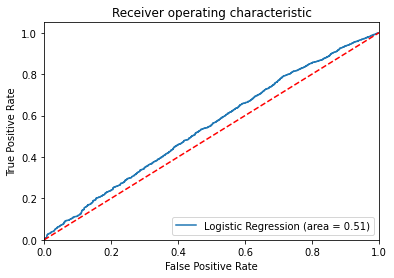

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [26]:
#calculate AUC of model
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit)
print(auc_logit)

0.5097971153289135


In [29]:
#decision tree - https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [90]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=5)
clf_en.fit(X_train, y_train)
y_pred_dt = clf_en.predict(X_test)

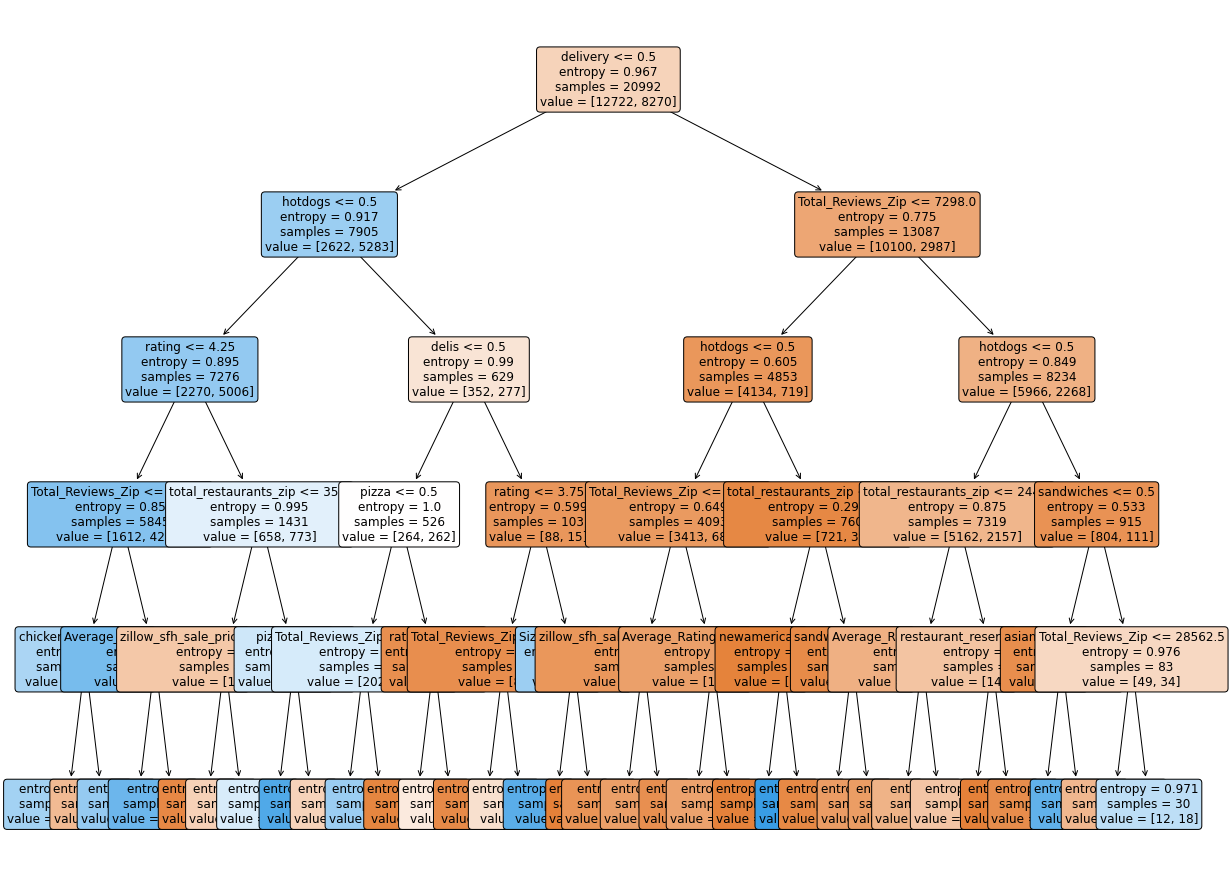

In [55]:
plt.figure(figsize = (20,16))
tree.plot_tree(clf_en, feature_names = list(X_train), fontsize = 12,rounded = True , filled = True);

In [91]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_dt)))

Model accuracy score with criterion entropy: 0.7438


In [57]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(confusion_matrix_dt)

[[4477  896]
 [1409 2215]]


In [58]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80      5373
           1       0.71      0.61      0.66      3624

    accuracy                           0.74      8997
   macro avg       0.74      0.72      0.73      8997
weighted avg       0.74      0.74      0.74      8997



In [60]:
auc_dt = metrics.roc_auc_score(y_test, y_pred_dt)
print(auc_dt)

0.7222216829795285


In [61]:
feature_list_dt = list(X_train.columns)
# Get numerical feature importances
importances = list(clf_en.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_dt, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: delivery             Importance: 0.73
Variable: Total_Reviews_Zip    Importance: 0.08
Variable: hotdogs              Importance: 0.07
Variable: rating               Importance: 0.04
Variable: total_restaurants_zip Importance: 0.02
Variable: Average_Rating_Zip   Importance: 0.02
Variable: pizza                Importance: 0.02
Variable: sandwiches           Importance: 0.01
Variable: chicken_wings        Importance: 0.01
Variable: delis                Importance: 0.01
Variable: price                Importance: 0.0
Variable: pickup               Importance: 0.0
Variable: restaurant_reservation Importance: 0.0
Variable: Average_Price_Zip    Importance: 0.0
Variable: tradamerican         Importance: 0.0
Variable: burgers              Importance: 0.0
Variable: coffee               Importance: 0.0
Variable: mexican              Importance: 0.0
Variable: breakfast_brunch     Importance: 0.0
Variable: newamerican          Importance: 0.0
Variable: italian              Importance: 0.0


In [62]:
# random forest model - https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652
from sklearn.ensemble import RandomForestClassifier

In [104]:
# Instantiate model
rf = RandomForestClassifier(n_estimators = 350, criterion = "gini", max_depth = 15)
# Train the model on training data
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)

In [105]:
print('Model accuracy score for random forest: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)))

Model accuracy score for random forest: 0.7523


In [106]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rf)

[[4620  753]
 [1476 2148]]


In [107]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      5373
           1       0.74      0.59      0.66      3624

    accuracy                           0.75      8997
   macro avg       0.75      0.73      0.73      8997
weighted avg       0.75      0.75      0.75      8997



In [108]:
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf)
print(auc_rf)

0.7262850307460776


In [109]:
feature_list_rf = list(X_train.columns)
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_rf, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: delivery             Importance: 0.37
Variable: rating               Importance: 0.06
Variable: Total_Reviews_Zip    Importance: 0.06
Variable: total_restaurants_zip Importance: 0.05
Variable: Average_Rating_Zip   Importance: 0.05
Variable: Average_Price_Zip    Importance: 0.04
Variable: pickup               Importance: 0.03
Variable: hotdogs              Importance: 0.03
Variable: price                Importance: 0.02
Variable: Unemployment_rate_2020 Importance: 0.02
Variable: SizeRank             Importance: 0.02
Variable: zillow_sfh_sale_price Importance: 0.02
Variable: pizza                Importance: 0.01
Variable: tradamerican         Importance: 0.01
Variable: sandwiches           Importance: 0.01
Variable: burgers              Importance: 0.01
Variable: coffee               Importance: 0.01
Variable: mexican              Importance: 0.01
Variable: breakfast_brunch     Importance: 0.01
Variable: newamerican          Importance: 0.01
Variable: italian              Impor

In [ ]:
#Naive Bayes (GaussianNB)
#https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python/notebook

In [115]:
from sklearn.preprocessing import RobustScaler
cols = X_train.columns
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [117]:
y_pred_nb = gnb.predict(X_test)

In [118]:
print('Model accuracy score for Naive Bayes - Gaussian: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score for Naive Bayes - Gaussian: 0.6029


In [119]:
confusion_matrix_rb = confusion_matrix(y_test, y_pred_nb)
print(confusion_matrix_rb)

[[4917  456]
 [3117  507]]


In [120]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.61      0.92      0.73      5373
           1       0.53      0.14      0.22      3624

    accuracy                           0.60      8997
   macro avg       0.57      0.53      0.48      8997
weighted avg       0.58      0.60      0.53      8997



In [121]:
auc_nb = metrics.roc_auc_score(y_test, y_pred_nb)
print(auc_nb)

0.5275159369326397


In [ ]:
#XGBoost 
#https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390

In [122]:
from scipy.stats import uniform, randint
!pip install xgboost
import xgboost as xgb

In [175]:
xgb_cl = xgb.XGBClassifier(eta=.1, max_depth = 7)
xgb_cl.fit(X_train, y_train)
y_pred_xgb = xgb_cl.predict(X_test)

In [176]:
print('Model accuracy score for XGBoost: {0:0.4f}'. format(accuracy_score(y_test, y_pred_xgb)))

Model accuracy score for XGBoost: 0.7590


In [177]:
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(confusion_matrix_xgb)

[[4651  722]
 [1446 2178]]


In [178]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      5373
           1       0.75      0.60      0.67      3624

    accuracy                           0.76      8997
   macro avg       0.76      0.73      0.74      8997
weighted avg       0.76      0.76      0.75      8997



In [179]:
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb)
print(auc_xgb)

0.7333088979358405


In [180]:
imp_features_xgb = xgb_cl.get_booster().get_score(importance_type="gain")
{k: v for k, v in sorted(imp_features_xgb.items(), key=lambda item: item[1], reverse=True)}

{'delivery': 118.22736358642578,
 'hotdogs': 23.691598892211914,
 'chicken_wings': 11.445265769958496,
 'mexican': 10.166533470153809,
 'japanese': 9.716278076171875,
 'newamerican': 8.87838077545166,
 'italian': 8.13509464263916,
 'delis': 7.225705146789551,
 'sandwiches': 7.189199924468994,
 'chinese': 6.735775470733643,
 'steak': 6.703718662261963,
 'pizza': 6.320083141326904,
 'mediterranean': 6.236205577850342,
 'Total_Reviews_Zip': 6.148074150085449,
 'coffee': 6.118718147277832,
 'restaurant_reservation': 6.083000659942627,
 'covid_high': 5.842723846435547,
 'asianfusion': 5.827420234680176,
 'cafes': 5.826242923736572,
 'vegetarian': 5.372157573699951,
 'icecream': 5.344324111938477,
 'vegan': 5.254461765289307,
 'Rural_urban_continuum_code_2013': 4.935182571411133,
 'bbq': 4.916090488433838,
 'tradamerican': 4.868152141571045,
 'juicebars': 4.867558002471924,
 'sportsbars': 4.6455793380737305,
 'rating': 4.194856643676758,
 'breakfast_brunch': 4.0786919593811035,
 'price': 4.0

In [181]:
from pickle import dump
dump(xgb_cl, open("xgb_cl"+".p", "wb"))